In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [36]:
demand_data = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
demand_data = demand_data.drop(['Wind Speed', 'Air Temperature', 'Air Temperature(Apparent)', 'Cloud Coverage'] , axis=1)
demand_data = demand_data.reset_index()
demand_data.rename(columns = {'Record Date':'ds', 'Total Demand':'y'}, inplace = True)
demand_data

,ds,y
0,2021-01-01,63342.0
1,2021-01-02,67819.0
2,2021-01-03,67018.0
3,2021-01-04,75574.0
4,2021-01-05,78002.0
...,...,...
1455,2018-12-27,68436.0
1456,2018-12-28,68179.0
1457,2018-12-29,64849.0
1458,2018-12-30,61282.0


In [37]:
# Period - How much in the future should the model predict
period = 29

In [38]:
# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-01-01')]
test_set = demand_data[(demand_data.ds >= '2021-01-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_10223/1293439588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_10223/1293439588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])


In [39]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(train_set)

Initial log joint probability = -18.5444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2858.08   0.000825411       98.9838           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       2859.97   0.000104321       185.139    6.29e-07       0.001      267  LS failed, Hessian reset 
     199       2860.16   4.50282e-05       67.1855           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       2860.36   0.000121986       90.6921   1.788e-06       0.001      452  LS failed, Hessian reset 
     299       2860.39    0.00025531       91.4827           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     392        2860.5   3.64752e-07       54.3072           1           1      606   
Optimization terminat

In [40]:
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

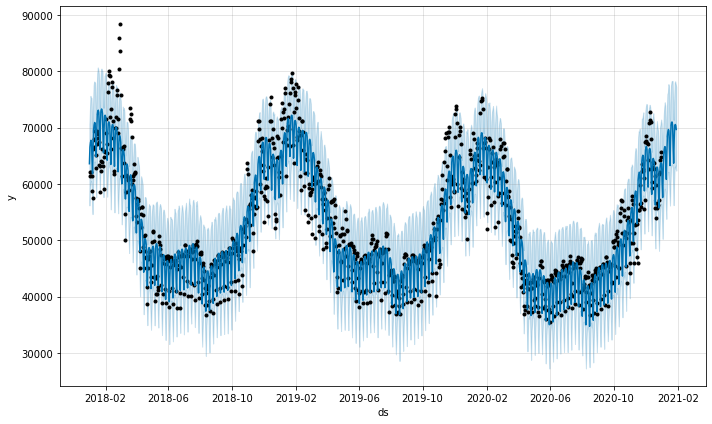

In [41]:
#Data visualization from the official source
figure_forecast = m.plot(forecast)

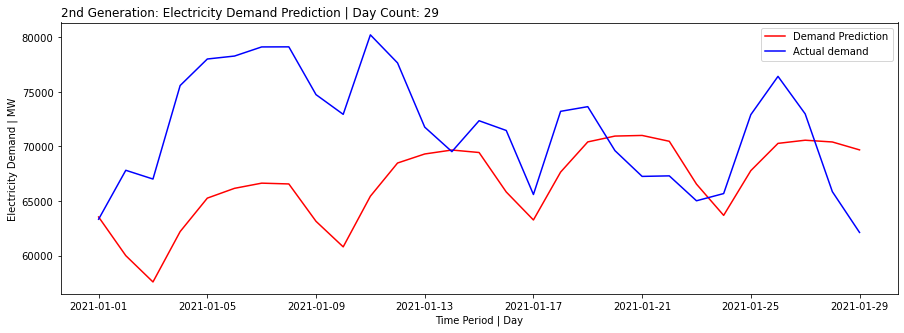

In [43]:
plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | Day Count: 29", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

# print('Your MSE:')
# print(mean_absolute_error(y_org, y_pred))